## Assignment #1
Gili Karni  
Septemeber 24, 2017

In [1]:
import random
import math
import time
import matplotlib.pyplot as plt
import numpy as np 

### 1 : 3 ways mergesort

This is a simpler implementation of the K way mergesort. After challenging myself in writing the generalizable code, I believe it to be the cleanest and clearest version, so I chose to use it here as well.

This implementation has three independent functions: split, merge, and mergesort (following the algorithm as it was explained in the textbook)

This code also contains the insertion sort function

The only changes are the elimination of the k_splits and subtracting them with a constant 3.
Comments for the merge, sort, and mergesort parts are in the k-way mergesort code
I focus on explaining the insertion sort and the combination between them here

In [2]:
# see kway mergesort (section 3)
def split (start, end):
    A_size = end - start
    split_arrays_indexes = []

    if A_size % 3 == 0 :
        split_size = A_size/3

        for divisible_index in range(start, end, split_size):

            split_arrays_indexes.append((divisible_index, divisible_index+split_size))

    else:
        if A_size < 3 :
            for smaller_than_k_index in range(start, end):
                split_arrays_indexes.append((smaller_than_k_index, smaller_than_k_index+1) )    

        else:

            split_size = (A_size/ 3)

            for remainder_index in range (2):
                split_arrays_indexes.append((start+(remainder_index * split_size), start+((remainder_index+1) * split_size)))

            last_group_start = split_arrays_indexes[-1][-1]
            split_arrays_indexes.append((last_group_start , end))

    return split_arrays_indexes


# see kway mergesort (section 3)
def merge (A, split_arrays_indexes_pairs):

    sub_A = ([(A[boundary_indexes[0]:boundary_indexes[-1]] + [float('inf')]) for boundary_indexes in split_arrays_indexes_pairs])
    
    A_start = split_arrays_indexes_pairs[0][0]
    A_end = split_arrays_indexes_pairs[-1][-1]

    merging_counter = A_end - A_start

    for merging_elemnt in range(merging_counter):
        
        min_value = float('inf')
        merged_index = None

        for index, current_value in enumerate(sub_A):
            
            if current_value[0] < min_value:
                min_value = current_value[0]
                merged_index = index

        A[A_start + merging_elemnt] = min_value
        sub_A[merged_index].pop(0)


In [3]:
# see kway mergesort (section 3)
def mergesort3(A, start, end) :

    if end - start <= 1 :
        return 

    else:
        split_A = split(start, end)
        
        for indexes in split_A:
            mergesort3(A, indexes[0], indexes[-1])

        merge(A, split_A)


### 2 : merge sort + insertion sort

In [4]:
# simplest insertion sort implementation
# for a given data, and section (reflected by its start and end indexes) this function loop through the array and swap location of relevant elements
# 2 loops to demonstrate the sequential comparing right to left of all elements to find each one's correct position.

def insertion_sort(A, start, end):

    # iterates through all elements in the current array and store each ones value and index
    for insertion_index in range (start, end): 
            
        current_element = A[insertion_index]
        position = insertion_index

        # iterates through all elements left to current element and swaps them if bigger than the current element
        while position > 0 and A[position -1] > current_element:
            A[position] = A[position-1] 
            position = position -1 

        A[position] = current_element 


In [5]:
# sorting using a combination of merge-sort and insertion sort
# this function is a version of the mergesort from the classic merge sort code, it has one modification: an extra condition that redirects the control to insertion sort under a given threshold

def merge_insetion_sort (A, start, end, threshold):

    # base case // recursion stopping condition remains the same 
    if end - start <= 1 : 
        return 

    # the recursion part checks if the length of the current array is bigger than the threshold
    else: 
        split_A = split(start, end) 
        
        for indexes in split_A: 
            
            if indexes[-1] - indexes[0] > threshold: 
                merge_insetion_sort(A, indexes[0], indexes[-1],threshold) 
            
            else:
                insertion_sort(A, indexes[0], indexes[-1]) 

        merge(A, split_A)



###  3: k way merge sort

Overall k way mergesort design: I have chosen to write the function in a way that manipulates the data directly. 
After trying both of them on the 3 - way mergesort I found it to be easier, and I believe to be more efficient memory wise.

This implementation has three independent functions: split, merge, and mergesort (following the algorithm as it was explained in the textbook)



In [6]:
## DIVIDE ##

# split: splits an array into K subarrays ('the current section')
# this function splits the current section, marked by its indexes, into k splits
# its input is the start and end indexes and the number of splits needed, it has no interaction with the actual data since it only determines the relevant subsections 
# its output is a list of pairs, each pair contains a start index and an end index of a subsection. important to notice that the output subsections create a sequence that matches the input current section


def split (start, end, k_splits):
    # A_size is the size of the current array
    # split_arrays_indexes is an empty array, which will contain the new pairs of indexes
    A_size = end - start
    split_arrays_indexes = []

    # there are three possible scenarios of an unknown split, represented by the following three conditions :
        
    # the current array is divisible by the given number of splits. This is the simples case
    # the divisible condition results in k pairs of equal size determined by the variable split_size
    # the loop interval is split_size, to create the indexes appropriately.
    if A_size % k_splits == 0 :
        split_size = A_size/k_splits

        for divisible_index in range(start, end, split_size):

            split_arrays_indexes.append((divisible_index, divisible_index+split_size))

    # the two other cases are when the length of the current array is not perfectly divisible by the number of splits

    # the first case is that the current array's length is smaller than the number of splits wanted: in this case, we will split the current array into subsection in size 1
    # the logic here is that a current array in this size will never be divisible by the wanted number of splits- so the most efficient and straightforward way is to advance it to its last splitting stage
    # the loop iterates to create one element subarrays

    # the second deals with remainders, using a two functionalities of python this condition splits the current array to k non-equal subarrays
    # the split_size will be the floor of the division (i.e., mathematically 7/3 = 2.33 so the group size should be 2 to have three groups [2,2,3]) 
    # the loop runs k_splits -1 times wherer the last group is added manually.  
    else:
        if A_size <= k_splits :
            for smaller_than_k_index in range(start, end):
                split_arrays_indexes.append((smaller_than_k_index, smaller_than_k_index+1) )

        else:

            split_size = (A_size/ k_splits)

            for remainder_index in range (k_splits-1):
                split_arrays_indexes.append((start+(remainder_index * split_size), start+((remainder_index+1) * split_size)))

            last_group_start = split_arrays_indexes[-1][-1]
            split_arrays_indexes.append((last_group_start , end))

    return split_arrays_indexes


In [7]:
## COMBINE ##

# merge: merges the subarrays back to an ordered array 
# this function swaps elements in the actual data, using the split_arrays_indexes_pairs.
# the split_arrays_indexes_pairs, contains a list of contiguous numbers that reflect the current array section in the data
# this function uses an external data structure to store the values of the current subsection.


def merge (A, split_arrays_indexes_pairs):

    # an array that stores the values in the current array given by the split_arrays_indexes_pairs
    # an infinity value is added to each subarray in the current array in order to mark their end
    sub_A = ([(A[boundary_indexes[0]:boundary_indexes[-1]] + [float('inf')]) for boundary_indexes in split_arrays_indexes_pairs])

    # A_start, A_end mark the indexes that start and end the current array in the data
    A_start = split_arrays_indexes_pairs[0][0]
    A_end = split_arrays_indexes_pairs[-1][-1]

    # this counter states the amount of elements needed to find their right index in the data
    # the inner iteration finds the smallest of all ordered subarrays (comparing their first elements) and store its value and index
    # the outer loop pops out the smallest element and place it in the right place in the data
    # the pop function (although less efficient is a clear way to maintain the loop invariant)
    
    merging_counter = A_end - A_start
    for merging_elemnt in range(merging_counter):

        # reset the storing variables
        min_value = float('inf')
        merged_index = None

        for index, current_value in enumerate(sub_A):

            if current_value[0] < min_value:
                min_value = current_value[0]
                merged_index = index

        # the location A_start + merging_elemnt is determined by the iteration on the amount of elements that being swapped 
        A[A_start + merging_elemnt] = min_value
        sub_A[merged_index].pop(0)


In [8]:
## CONQUER ##

# mergesort: recursively solve the problem, using merge and split to sort a given array
# The function takes the data, the current array (expressed by its start and end indexes) and the amount of wanted splits
# mergesort stopping condition for the recursion is when the current array length is 1 ( the end index equals to the start index +1)
# as long as this condition is not met, the function recursively splits the current array and calls itself for each subsection of it using a loop
# after all splits have been made, mergesort calls merge 

def mergesort(A, start, end, k_splits) :

    # best case // stopping condition
    if end <= start + 1 :
        return 

    # recursive part
    else:
        # split_A is a list of the subsection's indexes of the current array (expressed by start and end)
        split_A = split(start, end, k_splits)
     
        
        # loop through the sublists in split_A and re-call mergesort, after the loop is done (for every recurrence) merge combines the parts using split_A as the indicator
        for indexes in split_A:
       
            mergesort(A, indexes[0], indexes[-1], k_splits)

        merge(A, split_A)


#### best value for k :

##### mathematical answer :
   - given the function for the conplexity is $ O(n) = kn log_k n $ , I used differentiation to find the optimum value for k.
    - n and k are independent from one another and so I can find the derevative for k, treating n as a constant in the eqation
    - $ \frac{d}{dk} kn log_k n = 
    n\left(\frac{d}{dk}\left(k\right)\log _k\left(n\right)+\frac{d}{dk}\left(\log _k\left(n\right)\right)k\right)=
    n\left(1\cdot \log _k\left(n\right)+\left(-\frac{\ln \left(n\right)}{k\ln ^2\left(k\right)}\right)k\right)=
    n\left(\log _k\left(n\right)-\frac{\ln \left(n\right)}{\ln ^2\left(k\right)}\right)$
    -  $ n\left(\log _k\left(n\right)-\frac{\ln \left(n\right)}{\ln ^2\left(k\right)}\right)=0 ->
    n\left(\frac{\ln \left(n\right)}{\ln\left(k\right)}=\frac{\ln \left(n\right)}{\ln ^2\left(k\right)}\right)-> \ln k =1 -> k=e $
    - Using the second derivative test indicates taht this value represents the minimum of the function (as shown in  the graph below)
    - hence, the ssumption is that the best K will stabilized at e.
    

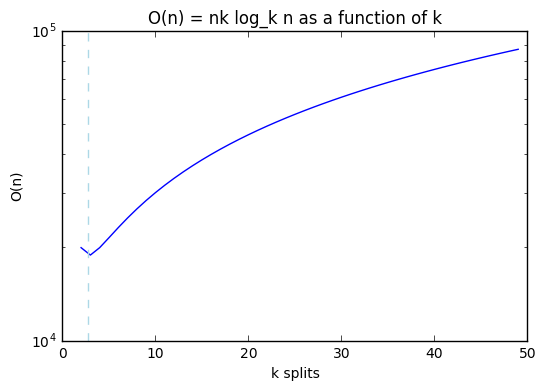

In [9]:
n = 1000

y = [(k*n)*(math.log(n, k)) for k in range(2,50)]
x = [i for i in range (2,50)]

plt.plot(x,y, color='blue')
plt.axvline(x=math.e, color= 'lightblue', linestyle='--')
plt.yscale('log')

plt.xlabel('k splits')
plt.ylabel('O(n)')
plt.title('O(n) = nk log_k n as a function of k')

plt.show()


In [10]:
## Empirical analyses

# This function captures the running time for each sorting instance
# The function gets a function f with its parameters and a dataset A, and returns its running time
def time_calc (f, A, start, end, splits):
    
    start_time = time.time()
    result = f(A, start, end, splits)
    runtime = (time.time() - start_time)

    return  runtime

# Runs a repetitive test on a given array x times and returns the mean results

def avg_test (number_of_tests,k_splits,array):
    avg_results = [0]*k_splits
    
    # Number of tests
    for test_number in range(number_of_tests):
        
        # range of different k
        for number_of_splits in range(2, k_splits):
            
            temporary_copy_of_array = array
            mergesort_results = time_calc(mergesort, temporary_copy_of_array,0,len(temporary_copy_of_array),number_of_splits)
            avg_results[number_of_splits] += mergesort_results
    
    return [[i_k,avg_results[i_k]] for i_k in range(k_splits)][2:-1]


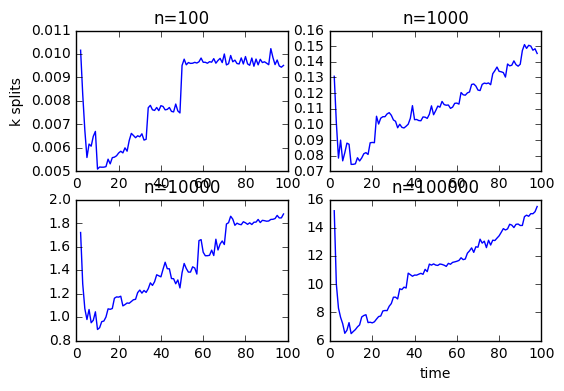

In [11]:
#power of 10
#number of max splits 
k_splits = 100
#an ampty dict to save the test results
results={}

for n_variations in [100,1000,10000,100000]:
    random_array = [random.randint(-100,100) for r in xrange(n_variations)]
    results[n_variations]= avg_test(3,k_splits,random_array)

# plot
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].plot([i[0] for i in results[100]],[i[1] for i in results[100]])
ax[0][0].set(title = 'n=100', ylabel ='time')

ax[0][1].plot([i[0] for i in results[1000]],[i[1] for i in results[1000]])
ax[0][1].set(title = 'n=1000')

ax[1][0].plot([i[0] for i in results[10000]],[i[1] for i in results[10000]])
ax[1][0].set(title = 'n=10000')

ax[1][1].plot([i[0] for i in results[100000]],[i[1] for i in results[100000]])
ax[1][1].set(title = 'n=100000', xlabel ='k splits')


plt.show()

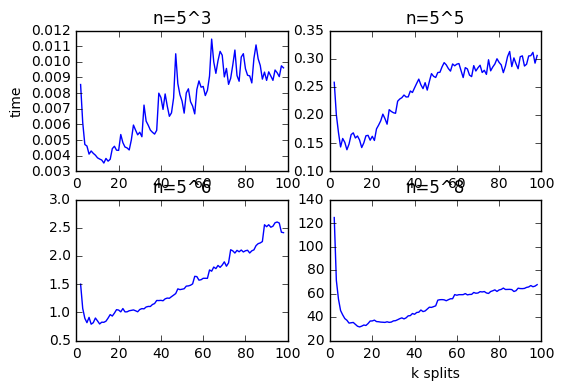

In [12]:
#number of max splits 
k_splits = 100
#an ampty dict to save the test results
results={}

for n_variations in [125,3125,15625,390625]:
    random_array = [random.randint(-100,100) for r in xrange(n_variations)]
    results[n_variations]= avg_test(3,k_splits,random_array)

# plot
fig, ax = plt.subplots(nrows=2, ncols=2)

ax[0][0].plot([i[0] for i in results[125]],[i[1] for i in results[125]])
ax[0][0].set(title = 'n=5^3', ylabel ='time')

ax[0][1].plot([i[0] for i in results[3125]],[i[1] for i in results[3125]])
ax[0][1].set(title = 'n=5^5')

ax[1][0].plot([i[0] for i in results[15625]],[i[1] for i in results[15625]])
ax[1][0].set(title = 'n=5^6')

ax[1][1].plot([i[0] for i in results[390625]],[i[1] for i in results[390625]])
ax[1][1].set(title = 'n=5^8', xlabel ='k splits')


plt.show()

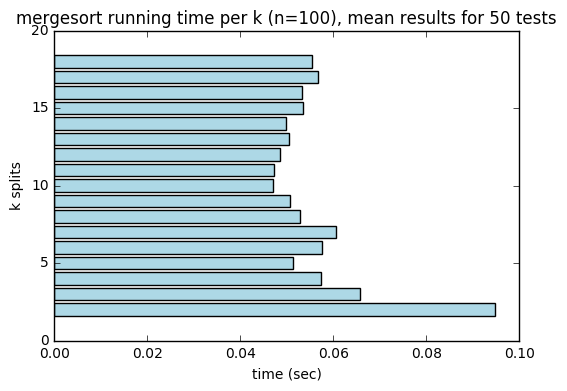

In [15]:
random_array = [random.randint(-100,100) for r in xrange(100)]

scope_results = avg_test(50,20,random_array)

fig, ax = plt.subplots()

ax.barh([i[0] for i in scope_results], [i[1] for i in scope_results], align='center', color='lightblue', ecolor='black')

ax.set_xlabel('time (sec)')
ax.set_ylabel('k splits')
ax.set_title('mergesort running time per k (n=100), mean results for 50 tests')

plt.show()

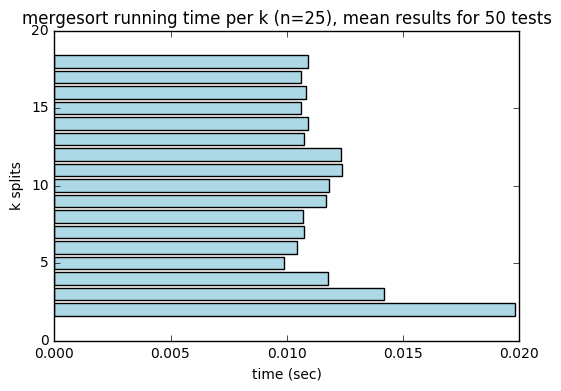

In [16]:
random_array = [random.randint(-100,100) for r in xrange(25)]

scope_results = avg_test(50,20,random_array)

fig, ax = plt.subplots()

ax.barh([i[0] for i in scope_results], [i[1] for i in scope_results], align='center', color='lightblue', ecolor='black')

ax.set_xlabel('time (sec)')
ax.set_ylabel('k splits')
ax.set_title('mergesort running time per k (n=25), mean results for 50 tests')

plt.show()

### analyses

Two instant observations -
1. The shape of the graph fits the nlogn shape ( when n is bigger enough )
2. The minimum value has shifted from anticipated k=e to about K~11 ( downgrading the scale shows some consistency between 11-13)

Conclusion and further ideas-
1. The results indicates the existence of a “best k” which suits any given n, as expected from the complexity theory.
2. I assume that the empirical results reflect, not only the algorithm complexity, but also the specific implementation and the computing environmental conditions. 
3. The horizontal shift in the graph (from e to 11) indicates an addition of a constant to the input k. As in $O(n) = n (k+C) log_{k+C} n$. 


In [3]:
print "k"

k
